In [5]:
import os, sys
import os.path as osp
sys.path.append(osp.dirname(os.getcwd()))
from project_directories import processed_dir

import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

src_dir = osp.join(processed_dir, 'v1-prot_bert_bfd')

In [7]:
all_bfactors = []
all_residues = torch.zeros(1, 1024, dtype=torch.float64)

pbar = tqdm([f for f in os.listdir(src_dir)
             if f.endswith('.pt') and not f.startswith('pre_')])
for i, f in enumerate(pbar):
    accession = f[:-3]
    pbar.set_description(accession)

    data_path = osp.join(src_dir, f)
    data = torch.load(data_path)
    
    all_bfactors += data['residue'].bfactor.tolist()
    all_residues += torch.sum(data['residue'].x, dim=0)

all_bfactors = np.array(all_bfactors)
all_residues = all_residues.numpy()

print(all_bfactors.shape)
print(all_residues.shape)

  0%|          | 0/8829 [00:00<?, ?it/s]

(2926529,)
(1, 1024)


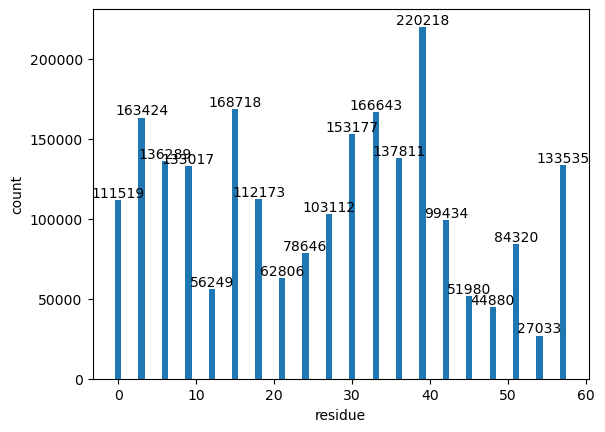

In [ ]:
fig, ax = plt.subplots()
bar_container = ax.bar(np.arange(20)*3, all_residues.squeeze())
ax.bar_label(bar_container, fmt='%d')
ax.set_xlabel('residue')
ax.set_ylabel('count')
plt.show()
plt.close()

In [ ]:
values = all_bfactors

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel('b-factor')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = 1/all_bfactors/500

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(reciprocal)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel('( 1 / b-factor ) * 0.002')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-reciprocal.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = np.clip(all_bfactors, 0, 1000)

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(clipped)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel('b-factor\n(clipped at 1000)')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-clipped.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = all_bfactors
values = - np.log(values)
# values = values - np.amin(values)
# values = values / np.amax(values)

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(negative log)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel(' - log( b-factor )')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-log.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = all_bfactors
values = - np.log(values)
values = values - np.amin(values)
values = values / np.amax(values)

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(negative log normalized)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel(' - log( b-factor ) (normalized)')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-log_normalized.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = all_bfactors + 1
values = - np.log(values)
# values = values - np.amin(values)
# values = values / np.amax(values)

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(translated & negative log)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel(' - log( b-factor + 1 )')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-log-2.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = all_bfactors + 1
values = - np.log(values)
values = values - np.amin(values)
values = values / np.amax(values)

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(translated & negative log & normalized)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel(' - log( b-factor + 1 )')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-log_normalized-2.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
values = all_bfactors + 1
values = - np.log(values)
values = values/10 + 1

amin = np.amin(values)
amax = np.amax(values)
mean = np.mean(values)
median = np.median(values)

plt.hist(values, bins=100)
plt.title(
    f'b-factor distribution\n(translated & negative log & scaled)\n'
    f'min: {amin:.4f}, max: {amax:.4f}\n'
    f'mean: {mean:.4f}, median: {median:.4f}'
)
plt.xlabel(' - log( b-factor + 1 ) / 10 + 1')
plt.ylabel('count')
# plt.show()
plt.savefig('bfactor-final.png', dpi=300, bbox_inches='tight')
plt.close()